In [55]:
import numpy as np
import matplotlib.cm as cm
import random
from matplotlib import pyplot as plt

In [56]:
if __name__ == '__main__':

    class C_Means():
        def __init__(self, dataset, n_clusters=3, fuzzy_c=2, cut_param=.9):
            self.dataset = dataset
            # Number of Clusters
            self.n_clusters = n_clusters
            # Fuzzy parameter
            self.fuzzy_c = fuzzy_c
            self.cut_param = cut_param
            # Maximum number of iterations
            self.max_iter_num = 100
            self.tolerance = .01
            self.dist = np.zeros((self.dataset.shape[0], self.n_clusters))
            self.centroids = np.array(
            [[np.random.uniform(0, 640), np.random.uniform(0, 480)] for i in range(self.n_clusters)])
            self.u = np.array([[np.random.uniform(0, 1) for i in range(self.n_clusters)] 
            for j in range(self.dataset.shape[0])])
            self.labels = np.array([])
        def get_dist2(self, list1, list2):
            return sum((i - j) ** 2 for i, j in zip(list1, list2))
        def distribute_data(self):
            # для каждого объекта рассчитываем расстояние до центра каждого кластера
            self.dist = np.array([[self.get_dist2(i, j) for i in self.centroids] for j in self.dataset])
            # рассчитываем коэффициент принадлежности u для данного объекта
            self.u = (1 / self.dist) ** (1 / (self.fuzzy_c - 1))
            # нормализуем коэффициенты u для данного объекта
            self.normalize_arr()
            self.u = (self.u / self.u.sum(axis=1)[:, None])
        def normalize_arr(self):
            arr_with_inf = np.where(np.isinf(self.u))
            lines = arr_with_inf[0]
            rows = arr_with_inf[1]
            for i in range(0, len(lines)):
                self.u[lines[i]] = 0
                self.u[lines[i]][rows[i]] = 1
        def recalculate_centroids(self):
            self.centroids = (self.u.T).dot(self.dataset) / self.u.sum(axis=0)[:, None]
        def fit(self):
            iter = 1
            while iter < self.max_iter_num:
                prev_centroids = np.copy(self.centroids)
                # рассчитываем центры кластеров
                self.recalculate_centroids()
                self.distribute_data()
                if max([self.get_dist2(i, k) for i, k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                    break
                iter += 1
        # getting the clusters
        def getLabels(self):
            labels = np.array([])
            for i in range(len(self.u)):
                i_max = self.u[i][0]
                i_max_indx = 0
                for j in range(len(self.u[i])):
                    if (self.u[i][j] > i_max):
                        i_max = self.u[i][j]
                        i_max_indx = j
                    if (i_max > self.cut_param):
                        labels = np.append(list(labels), i_max_indx + 1).astype(int)
                    else:
                        labels = np.append(list(labels), 0).astype(int)
            return labels

In [75]:
# генерируем данные
# uniform дает floating-point значение
n=20
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(10)])
dataset[:,1]

array([16.83812085, 13.78252324,  0.66247754, 14.40357329,  4.32872315,
        7.17864407, 12.01312653,  7.39333373, 18.4053173 ,  7.74968164])

In [76]:
# fit the fuzzy-c-means
test = C_Means(dataset, 3, 2, .5)
test.fit()
colors = np.array(['b', 'g', 'b', 'r','o','black'])
pred = test.getLabels()

In [77]:
x = np.arange(len(dataset))
ys = [i+x+(i*x)**2 for i in range(len(dataset))]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))

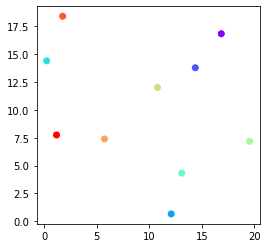

In [78]:
# scatter plots
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors)
plt.show()